<h1><b><center>Projet 5_Maintenance</center></b></h1>
<h1><b><center>Segmentez les clients d'un site e-commerce</center></b></h1>

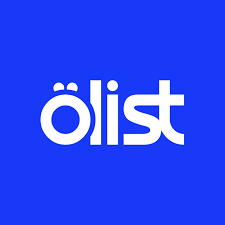

Nous commeçons par l'importation du dataframe 'rfm_data' et 'df_6'. Le dataframe 'df_6' sera utilisé pour recalculer le 'rfm_data' pour des nouvelles périodes.

In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import sklearn.cluster as cluster
from sklearn.metrics.cluster import adjusted_rand_score

os.chdir('Desktop/OC/Projet_5')

In [2]:
# Importation du dataframe 'rfm_data'

rfm_data = pd.read_csv('rfm_data.csv')
rfm_data = rfm_data.drop("Unnamed: 0", axis = 1)
rfm_data

,customer_unique_id,purchase_date,recénce,fréquence,montant
0,0000366f3b9a7992bf8c76cfdf3221e2,2018-09-03 09:06:57,115,1,129.90
1,0000b849f77a49e4a4ce2b2a4ca5be3f,2018-09-03 09:06:57,118,1,18.90
2,0000f46a3911fa3c0805444483337064,2018-09-03 09:06:57,541,1,69.00
3,0000f6ccb0745a6a4b88665a16c9f078,2018-09-03 09:06:57,325,1,25.99
4,0004aac84e0df4da2b147fca70cf8255,2018-09-03 09:06:57,292,1,180.00
...,...,...,...,...,...
94984,fffcf5a5ff07b0908bd4e2dbc735a684,2018-09-03 09:06:57,451,1,1570.00
94985,fffea47cd6d3cc0a88bd621562a9d061,2018-09-03 09:06:57,266,1,64.89
94986,ffff371b4d645b6ecea244b27531430a,2018-09-03 09:06:57,572,1,89.90
94987,ffff5962728ec6157033ef9805bacc48,2018-09-03 09:06:57,123,1,115.00


In [3]:
# Importation du dataframe 'df_6'

df_6 = pd.read_csv('df_6.csv')
df_6 = df_6.drop("Unnamed: 0", axis = 1)
df_6

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,price,freight_value,Total_Value,purchase_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,124.99,21.88,146.87,2017-05-16 15:05:35
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,289.00,46.48,335.48,2018-01-12 20:48:24
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,139.94,17.79,157.73,2018-05-19 16:07:45
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,149.94,23.36,173.30,2018-03-13 16:06:38
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,230.00,22.25,252.25,2018-07-29 09:51:30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98200,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,74.90,13.88,88.78,2018-04-07 15:48:17
98201,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,114.90,14.16,129.06,2018-04-04 08:20:22
98202,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,37.00,19.04,56.04,2018-04-08 20:11:50
98203,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,689.00,22.07,711.07,2017-11-03 21:08:33


Dans le notebook 'Projet 5_Exploration', nous avons constaté que la première commande est le 4 septembre 2016 et la dernière commande est le 3 septembre 2018. Donc, la base de données s'étend à une période de 2 ans.

Pour la stabilité du modèle, nous définissons un dataframe défault qui contiendra les informations du RFM pour une période d'un an. Ensuite, nous ajouterons les données un mois par un afin d'évaluer la stabilité du modèle de clustering.

D'abord, nous changeons le datatype de la colonne 'order_purchase_timestamp' du 'df_6'.

In [4]:
# Changement du datatype

df_6['order_purchase_timestamp'] = pd.to_datetime(df_6['order_purchase_timestamp'])

Ensuite, nous définissons les limites en temps de la base de données.

In [5]:
# min_date et max_date

min = '2016-09-04 21:15:19'
max = '2018-09-03 09:06:57'
min_date = pd.to_datetime(min)
max_date = pd.to_datetime(max)

Maintenant, nous créeons le dataframe défaut 'rfm_def' qui contiendra les données du 4 septembre 2016 au 3 septembre 2017.

In [6]:
# Création du rfm_def

orders_def = df_6[df_6['order_purchase_timestamp'] < '09/04/17']

rfm_def = orders_def.groupby('customer_unique_id').agg({'purchase_date': lambda x: (max_date), 'order_purchase_timestamp': lambda x: (max_date - x.max()).days,
                                                        'customer_id':'count', 'price':'sum'}).reset_index()
rfm_def.columns = ['customer_unique_id', 'purchase_date', 'recénce', 'fréquence', 'montant']
X = rfm_def.iloc[:, 2:5]
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
rfm_def['Clusters_def'] = y_kmeans
rfm_def

,customer_unique_id,purchase_date,recénce,fréquence,montant,Clusters_def
0,0000f46a3911fa3c0805444483337064,2018-09-03 09:06:57,541,1,69.00,0
1,0005e1862207bf6ccc02e4228effd9a0,2018-09-03 09:06:57,547,1,135.00,0
2,0006fdc98a402fceb4eb0ee528f6a8d4,2018-09-03 09:06:57,411,1,13.90,0
3,000a5ad9c4601d2bbdd9ed765d5213b3,2018-09-03 09:06:57,387,1,76.99,0
4,000de6019bb59f34c099a907c151d855,2018-09-03 09:06:57,381,1,229.80,0
...,...,...,...,...,...,...
22595,fff3a9369e4b7102fab406a334a678c3,2018-09-03 09:06:57,387,1,84.90,0
22596,fff699c184bcc967d62fa2c6171765f7,2018-09-03 09:06:57,366,1,39.90,0
22597,fffcf5a5ff07b0908bd4e2dbc735a684,2018-09-03 09:06:57,451,1,1570.00,3
22598,ffff371b4d645b6ecea244b27531430a,2018-09-03 09:06:57,572,1,89.90,0


Nous ajoutons les données mois par mois. Donc, nous définissons les dates du mise à jour avec la liste 'dates'.

In [7]:
# Dates de mise à jour

dates = ['10/04/17', '11/04/17', '12/04/17', '01/04/18', '02/04/18', '03/04/18',
        '04/04/18', '05/04/18', '06/04/18', '07/04/18', '08/04/18', '09/04/18']

Maintenant, nous calculons le RFM pour le dataframe suite à chaque mise à jour.

In [8]:
# RFM suite à chaque mise à jour

rfm_mois = []
for date in dates:
    n = df_6[df_6['order_purchase_timestamp'] < date]
    rfm_per = n.groupby('customer_unique_id').agg({'purchase_date': lambda x: (max_date), 'order_purchase_timestamp': lambda x: (max_date - x.max()).days,
                                                   'customer_id':'count', 'price':'sum'}).reset_index()
    rfm_per.columns =['customer_unique_id','purchase_date', 'recénce', 'fréquence', 'montant']
    X = rfm_per.iloc[:, 2:5]
    kmeans = KMeans(n_clusters = 4)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    rfm_per['Clusters_per'] = y_kmeans
    merged_mois = pd.merge(rfm_def, rfm_per, how = 'left', on = 'customer_unique_id')
    rfm_mois.append(merged_mois['Clusters_per'])
    print("Lignes de données suite au mise à jour:", len(n))

Lignes de données suite au mise à jour: 27554
Lignes de données suite au mise à jour: 32001
Lignes de données suite au mise à jour: 39775
Lignes de données suite au mise à jour: 45171
Lignes de données suite au mise à jour: 52487
Lignes de données suite au mise à jour: 59231
Lignes de données suite au mise à jour: 66386
Lignes de données suite au mise à jour: 73425
Lignes de données suite au mise à jour: 79922
Lignes de données suite au mise à jour: 86119
Lignes de données suite au mise à jour: 92701
Lignes de données suite au mise à jour: 98205


L'ARI Score nous permet d'évaluer la stabilité du modèle. Quand l'ARI Score baisse au-delà de 0.5, il faut mettre à jour le modèle du clustering. L'ARI Score est calculé pour les données pour chaque mise à jour.

In [9]:
# Évaluation d'ARI Score après chaque mise à jour

a = rfm_def['Clusters_def']
b_1 = rfm_mois[0]
b_2 = rfm_mois[1]
b_3 = rfm_mois[2]
b_4 = rfm_mois[3]
b_5 = rfm_mois[4]
b_6 = rfm_mois[5]
b_7 = rfm_mois[6]
b_8 = rfm_mois[7]
b_9 = rfm_mois[8]
b_10 = rfm_mois[9]
b_11 = rfm_mois[10]
b_12 = rfm_mois[11]
m_1 = adjusted_rand_score(b_1, a)
m_2 = adjusted_rand_score(b_2, a)
m_3 = adjusted_rand_score(b_3, a)
m_4 = adjusted_rand_score(b_4, a)
m_5 = adjusted_rand_score(b_5, a)
m_6 = adjusted_rand_score(b_6, a)
m_7 = adjusted_rand_score(b_7, a)
m_8 = adjusted_rand_score(b_8, a)
m_9 = adjusted_rand_score(b_9, a)
m_10 = adjusted_rand_score(b_10, a)
m_11 = adjusted_rand_score(b_11, a)
m_12 = adjusted_rand_score(b_12, a)

In [10]:
# ARI scores

data = {'Mois':  list(range(1,13)), 'ARI Score': [m_1, m_2, m_3, m_4, m_5, m_6, m_7, m_8, m_9, m_10, m_11, m_12]}
comparaison = pd.DataFrame(data)
comparaison

,Mois,ARI Score
0,1,0.830539
1,2,0.825418
2,3,0.247918
3,4,0.312052
4,5,0.436507
5,6,0.635705
6,7,0.615428
7,8,0.588945
8,9,0.536439
9,10,0.519809


Nous constatons qu'après l'ajout de 3 mois de données, le modèle commence à perdre sa stabilité. De ce fait, le contrat de maintenance indiquera que la maintenance sera effectué après 3 mois.

Maintenant, nous évaluerons la validité de cette hypothèse en utilisant un 'rfm_def' avec 15 mois de données. Ensuite, nous ajouterons les données mois par mois afin d'évaluer sa stabilité.

In [11]:
# Nouveau rfm_def

orders_def = df_6[df_6['order_purchase_timestamp'] < '12/04/17']
rfm_def = orders_def.groupby('customer_unique_id').agg({'purchase_date': lambda x: (max_date), 'order_purchase_timestamp': lambda x: (max_date - x.max()).days,
                                                        'customer_id':'count', 'price':'sum'}).reset_index()
rfm_def.columns =['customer_unique_id', 'purchase_date', 'recénce', 'fréquence', 'montant']
X = rfm_def.iloc[:, 2:5]
kmeans = KMeans(n_clusters = 4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
rfm_def['Clusters_def'] = y_kmeans
rfm_def

,customer_unique_id,purchase_date,recénce,fréquence,montant,Clusters_def
0,0000f46a3911fa3c0805444483337064,2018-09-03 09:06:57,541,1,69.00,2
1,0000f6ccb0745a6a4b88665a16c9f078,2018-09-03 09:06:57,325,1,25.99,0
2,0004aac84e0df4da2b147fca70cf8255,2018-09-03 09:06:57,292,1,180.00,0
3,0005e1862207bf6ccc02e4228effd9a0,2018-09-03 09:06:57,547,1,135.00,2
4,0006fdc98a402fceb4eb0ee528f6a8d4,2018-09-03 09:06:57,411,1,13.90,0
...,...,...,...,...,...,...
38570,fff699c184bcc967d62fa2c6171765f7,2018-09-03 09:06:57,366,1,39.90,0
38571,fffa431dd3fcdefea4b1777d114144f2,2018-09-03 09:06:57,307,1,64.99,0
38572,fffcf5a5ff07b0908bd4e2dbc735a684,2018-09-03 09:06:57,451,1,1570.00,1
38573,ffff371b4d645b6ecea244b27531430a,2018-09-03 09:06:57,572,1,89.90,2


In [12]:
# Évaluation du rfm après chaque mise à jour

dates = ['01/04/18', '02/04/18', '03/04/18', '04/04/18', '05/04/18', '06/04/18', '07/04/18', '08/04/18', '09/04/18']

rfm_mois = []
for date in dates:
    n = df_6[df_6['order_purchase_timestamp'] < date]
    rfm_per = n.groupby('customer_unique_id').agg({'purchase_date': lambda x: (max_date), 'order_purchase_timestamp': lambda x: (max_date - x.max()).days,
                                                   'customer_id':'count', 'price':'sum'}).reset_index()
    rfm_per.columns = ['customer_unique_id', 'purchase_date', 'recénce', 'fréquence', 'montant']
    X = rfm_per.iloc[:,2:5]
    kmeans = KMeans(n_clusters = 4)
    kmeans.fit(X)
    y_kmeans = kmeans.predict(X)
    rfm_per['Clusters_per'] = y_kmeans
    merged_mois = pd.merge(rfm_def, rfm_per, how = 'left', on = 'customer_unique_id')
    rfm_mois.append(merged_mois['Clusters_per'])
    print("Lignes de données suite au mise à jour:", len(n))

Lignes de données suite au mise à jour: 45171
Lignes de données suite au mise à jour: 52487
Lignes de données suite au mise à jour: 59231
Lignes de données suite au mise à jour: 66386
Lignes de données suite au mise à jour: 73425
Lignes de données suite au mise à jour: 79922
Lignes de données suite au mise à jour: 86119
Lignes de données suite au mise à jour: 92701
Lignes de données suite au mise à jour: 98205


In [13]:
# ARI scores

a = rfm_def['Clusters_def']
b_1 = rfm_mois[0]
b_2 = rfm_mois[1]
b_3 = rfm_mois[2]
b_4 = rfm_mois[3]
b_5 = rfm_mois[4]
b_6 = rfm_mois[5]
b_7 = rfm_mois[6]
b_8 = rfm_mois[7]
b_9 = rfm_mois[8]

m_1 = adjusted_rand_score(b_1, a)
m_2 = adjusted_rand_score(b_2, a)
m_3 = adjusted_rand_score(b_3, a)
m_4 = adjusted_rand_score(b_4, a)
m_5 = adjusted_rand_score(b_5, a)
m_6 = adjusted_rand_score(b_6, a)
m_7 = adjusted_rand_score(b_7, a)
m_8 = adjusted_rand_score(b_8, a)
m_9 = adjusted_rand_score(b_9, a)

data_1 = {'Mois':  list(range(1, 10)), 'ARI Score': [m_1, m_2, m_3, m_4, m_5, m_6, m_7, m_8, m_9]}
comparaison_1 = pd.DataFrame(data_1)
comparaison_1

,Mois,ARI Score
0,1,0.829886
1,2,0.622677
2,3,0.507141
3,4,0.388747
4,5,0.307919
5,6,0.239891
6,7,0.191673
7,8,0.158726
8,9,0.194198


À nouveau, nous constatons quele modèle commence à devenir instable après 3 mois. Donc, après la première maintenance (+ 3 mois de données), le modèle perd à nouveau sa stabilité après 3 mois. 

Nous validons la période de maintenance du code de clustering comme 3 mois.